# Assignment Python 1 
___
Rheina Febrianti Khairunissa <br>
PYTN-KS17-014

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_lc = pd.read_csv('london_crime_by_lsoa.csv')
print('Data berhasil diinput!')

Data berhasil diinput!


In [3]:
df_lc.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


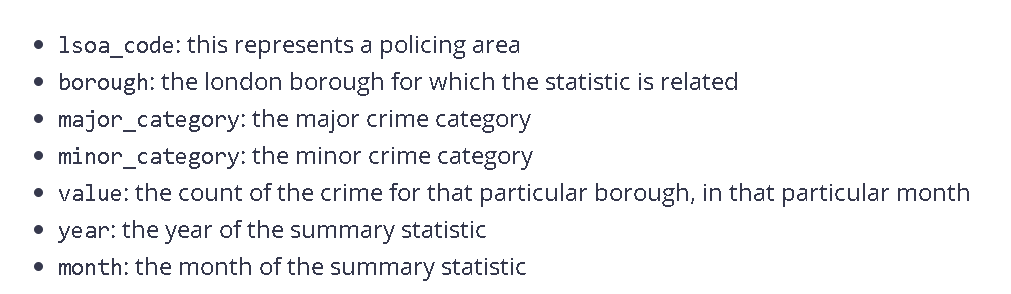

In [4]:
df_lc.shape

(13490604, 7)

In [5]:
df_lc.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

In [6]:
df_lc.describe(include= 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180


In [7]:
df_lc.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## Line Plot
Question: How was the trend of total crime cases each year from 2008 - 2016?

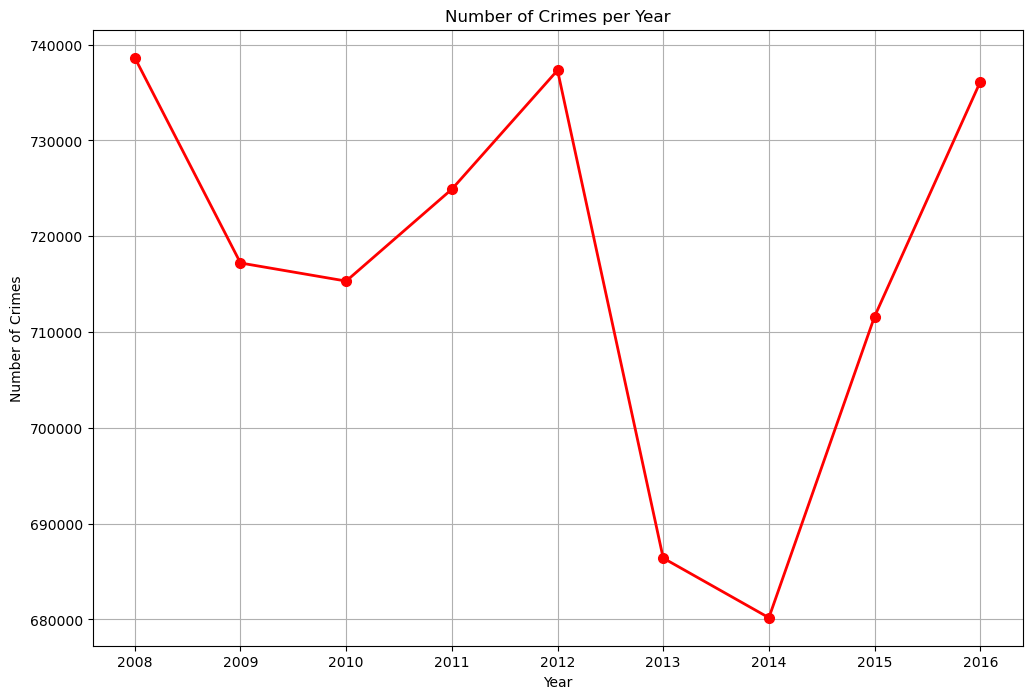

In [34]:
crimesPerYear = {}

for year in np.sort(df_lc['year'].unique()):
    crimesY = df_lc.loc[df_lc['year'] == year]
    crimesPerYear[year] = sum(crimesY['value'])

valSort= list(crimesPerYear.values())

plt.figure(figsize=(12,8))
plt.plot(range(len(crimesPerYear.keys())), list(crimesPerYear.values()),
        linewidth= 2, color='red', marker='o', markersize=7.0)


plt.xticks(range(len(crimesPerYear.keys())), crimesPerYear.keys())
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.grid()

Answer: Based on the line plot above, it can be seen that crime cases fluctuate. Most crime reports occurred in 2008, 2012, and 2016. Meanwhile, 2013 and 2014 experienced quite a few crime reports compared to other years.

## Area Plot

Question: Which boroughs have the highest yearly and monthly totals for criminal cases?

In [8]:
# for yearly
df_areaY = df_lc.pivot_table(index='year', columns ='borough', values='value', aggfunc=sum)
df_areaY

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [9]:
# for monthly
df_areaM = df_lc.pivot_table(index='month', columns ='borough', values='value', aggfunc=sum)
df_areaM

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
month,,,,,,,,,,,,,,,,,,,,,
1,12610,17550,9576,18744,15770,22288,58,22198,20398,15888,...,9595,21612,15637,7843,22776,8241,17762,16792,16402,37928
2,12193,16659,8959,17535,14684,21332,56,19986,19629,15667,...,9067,20462,14521,7315,21518,8043,16958,15673,15902,34713
3,13451,18447,10133,19296,15843,24027,49,22015,21401,16966,...,9929,22749,16282,8279,23301,8970,18988,17396,17370,38349
4,12323,17421,9179,18026,14714,22305,53,20954,20416,15731,...,9372,20887,14574,7905,22248,8498,18322,16748,16464,35934
5,12844,17999,9903,19718,15785,24181,61,22169,22067,16680,...,10036,21901,15359,8819,24127,8669,19821,17669,17690,37661
6,12451,17908,9492,19342,15159,23514,52,22376,21753,16683,...,9915,21967,15195,8375,24205,8822,19848,17962,17687,37216
7,13205,18297,9805,19698,16164,24133,53,22629,22557,16628,...,10205,22758,15517,8498,24553,8557,21406,17927,18387,40293
8,12315,16775,9063,18478,14703,21900,75,21623,20806,15445,...,9259,21683,14410,7911,23847,7933,19589,16939,16765,38090
9,11883,16902,9053,18184,14616,21731,90,21255,20249,15447,...,9274,21345,14725,8231,22926,8050,19040,16619,17306,35608


In [10]:
df_areaY.isnull().sum()

borough
Barking and Dagenham      0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
City of London            0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith and Fulham    0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington and Chelsea    0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
dtype: int64

In [11]:
df_areaM.isnull().sum()

borough
Barking and Dagenham      0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
City of London            0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith and Fulham    0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington and Chelsea    0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
dtype: int64

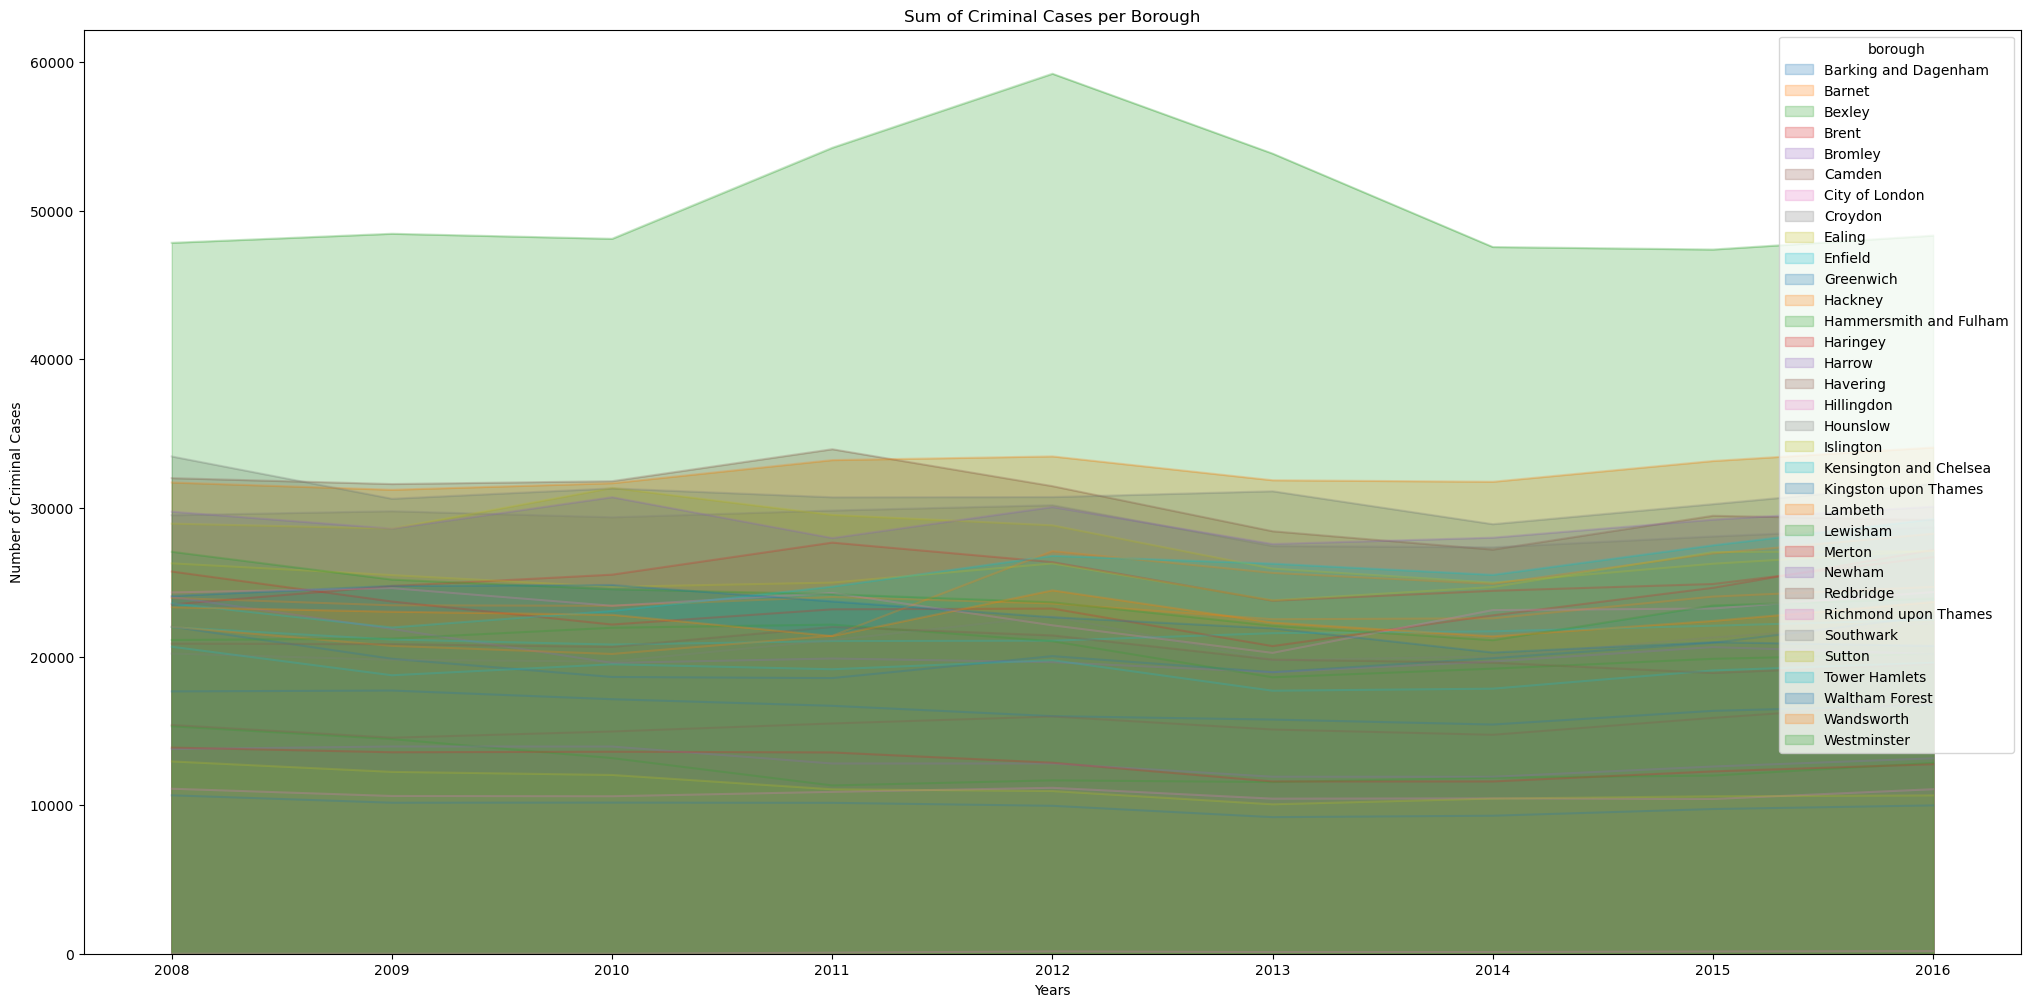

In [12]:
# yearly 

df_areaY.plot(kind='area', 
             alpha=0.25, 
             stacked=False,
             figsize=(25, 12)
        )

plt.title('Sum of Criminal Cases per Borough')
plt.ylabel('Number of Criminal Cases')
plt.xlabel('Years')

plt.show()

Answer: Based on the area plot that shown above, we can say that Westminster has the highest cumulative rate of yearly criminal cases, and that the number of cases increased significantly in 2012.

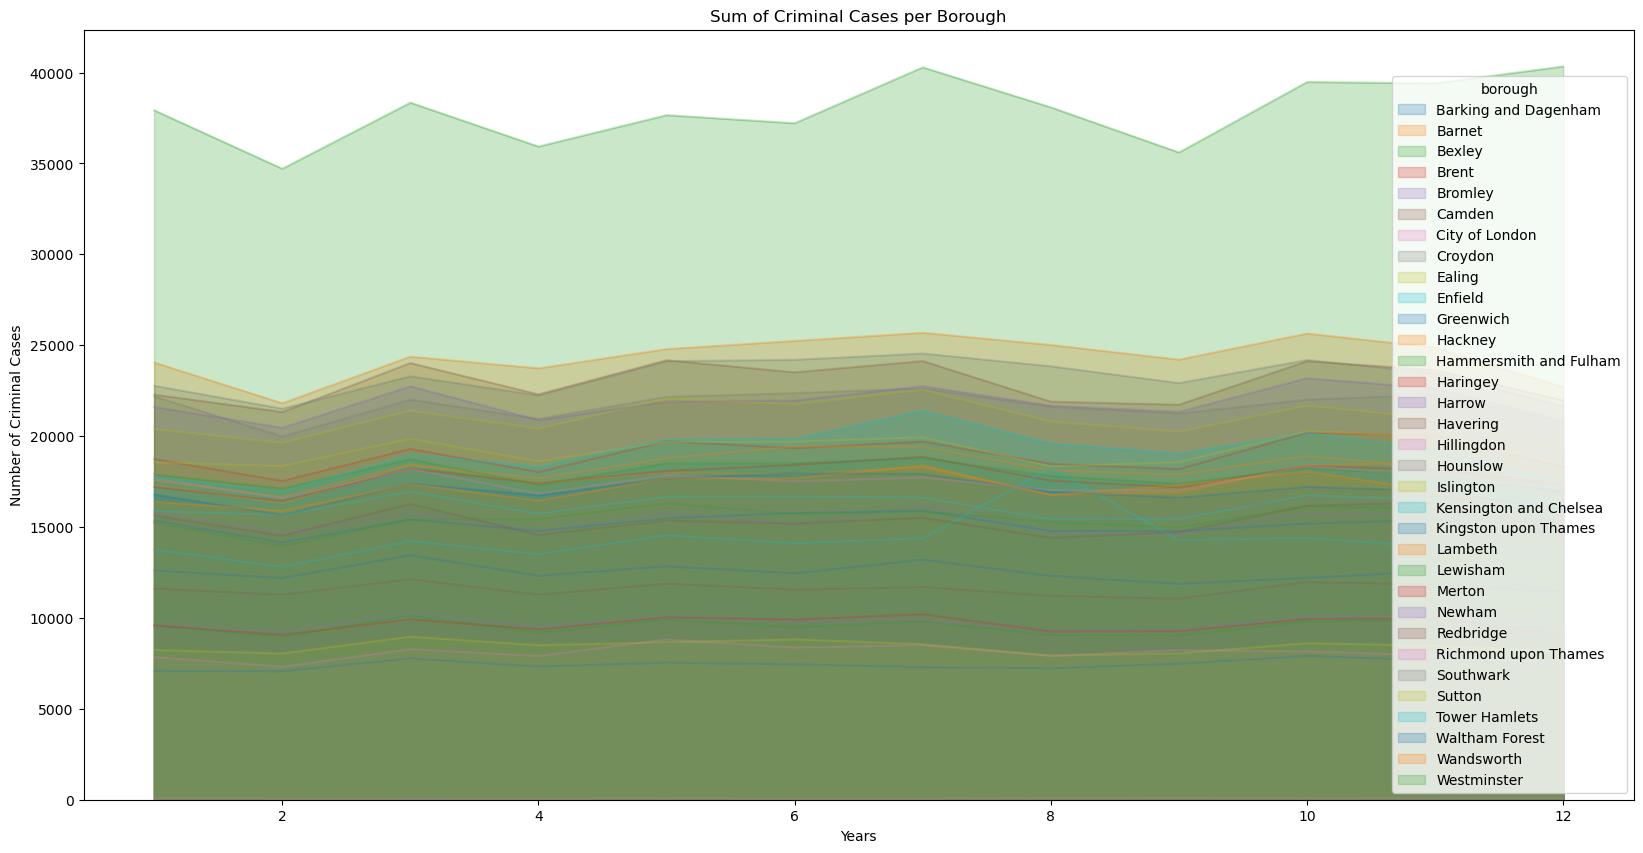

In [13]:
# Monthly

df_areaM.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10)
        )

plt.title('Sum of Criminal Cases per Borough')
plt.ylabel('Number of Criminal Cases')
plt.xlabel('Years')

plt.show()

Answer: Based on the area plot that shown above, Westminster still the highest annual percentage of criminal cases by monthly. While the mean appears to remain stable, time series data movements often go up and down.

## Histogram
Question: What is the frequency distribution of the top 3 number criminal cases from the London's borough in 2008-2013?

In [14]:
df_lh = df_lc[df_lc['year'] <= 2013]
df_lh

,lsoa_code,borough,major_category,minor_category,value,year,month
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
...,...,...,...,...,...,...,...
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


In [15]:
df_lh = df_lh.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
df_lh['Total'] = df_lh.sum(axis=1)
df_lh.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_lh_top3 = df_lh.drop('Total', axis=1, inplace=True)
df_lh_top3 = df_lh.head(n=3).transpose()
df_lh_top3

borough,Westminster,Lambeth,Camden
year,,,
2008,47846,31717,32010
2009,48456,31225,31612
2010,48116,31671,31804
2011,54243,33224,33956
2012,59226,33473,31472
2013,53852,31868,28435


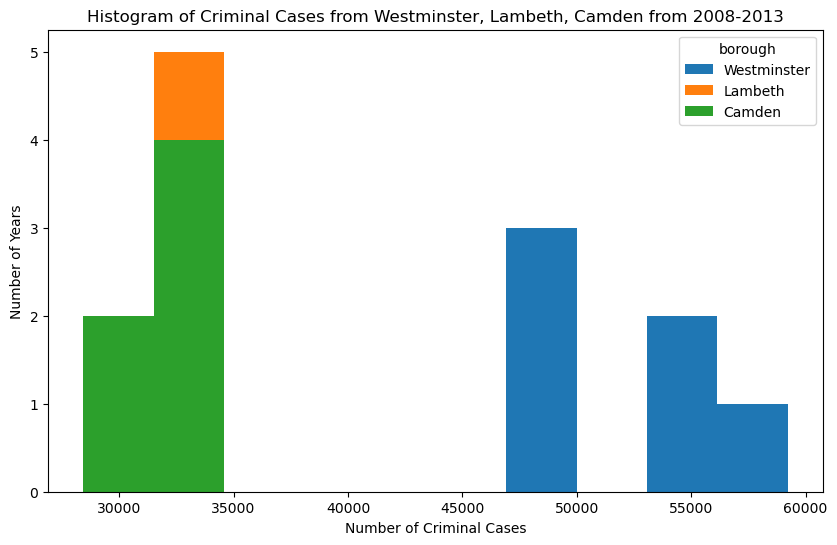

In [16]:
df_lh_top3.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

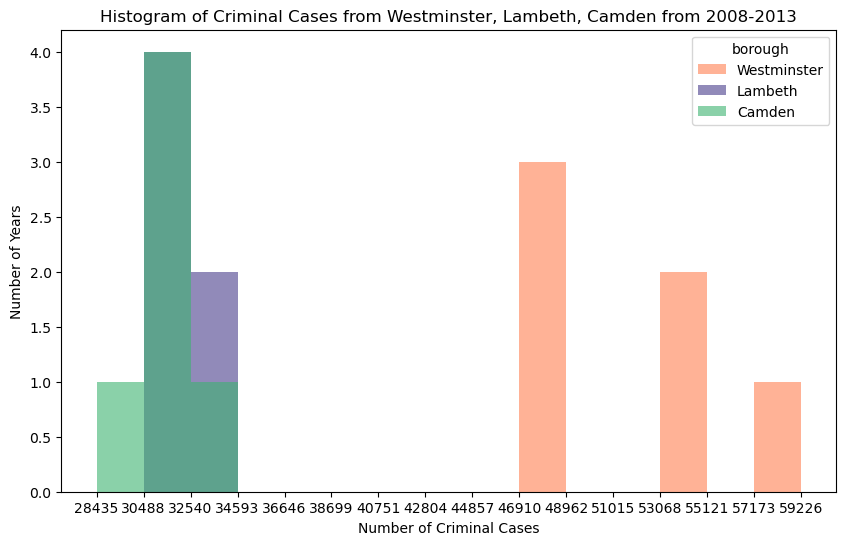

In [17]:
count, bin_edges = np.histogram(df_lh_top3, 15)

df_lh_top3.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

Answer: Based on the histogram above, we can say that Westminster has a more evenly distributed frequency distribution of criminal cases than Lambeth and Camden.

## Bar Chart
Question: <br>
1. Number of crimes in major categories in the City of London from 2008 - 2016 <br>
2. Number of crimes in minor categories in the City of London from 2008 - 2016

In [18]:
# in major categories

category_maj= df_lc.major_category.value_counts()
category_maj

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

<Axes: title={'center': 'Sum of Crimes at Major Category in London from 2008-2016'}>

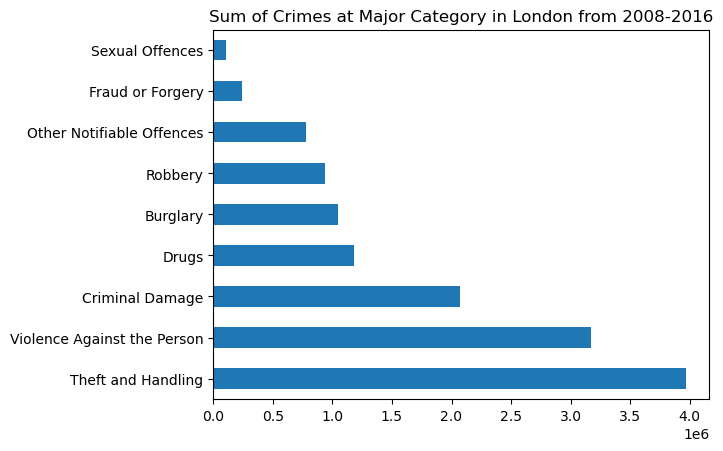

In [19]:
category_maj.plot.barh(title = "Sum of Crimes at Major Category in London from 2008-2016", fontsize=10)

Answer: Based on the bar plot above, there are 9 categories of major crimes received and the highest number is thief and handling.

In [20]:
# minor categories

category_min= df_lc.minor_category.value_counts()
category_min

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

<Axes: title={'center': 'Sum of Crimes at Minor Category in London from 2008-2016'}>

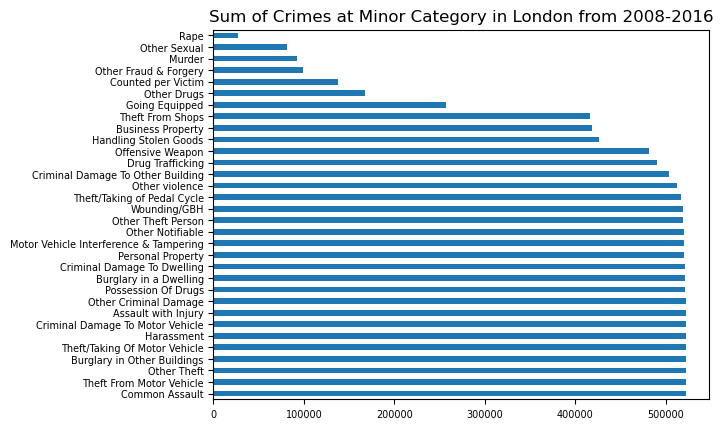

In [21]:
category_min.plot.barh(title = "Sum of Crimes at Minor Category in London from 2008-2016", fontsize=7)

Based on the bar plot above, there are 32 categories of minor crimes that have been reported and the highest crime rates are Common Assault, Theft From Motor Vehicle, and Other Theft.

## Pie Chart
Question: Which number of major category of crime are most in London?

In [22]:
df_major = df_lc.groupby('major_category', axis=0).sum()
df_major

C:\Users\RHEINA\AppData\Local\Temp\ipykernel_3316\361082290.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_major = df_lc.groupby('major_category', axis=0).sum()


,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


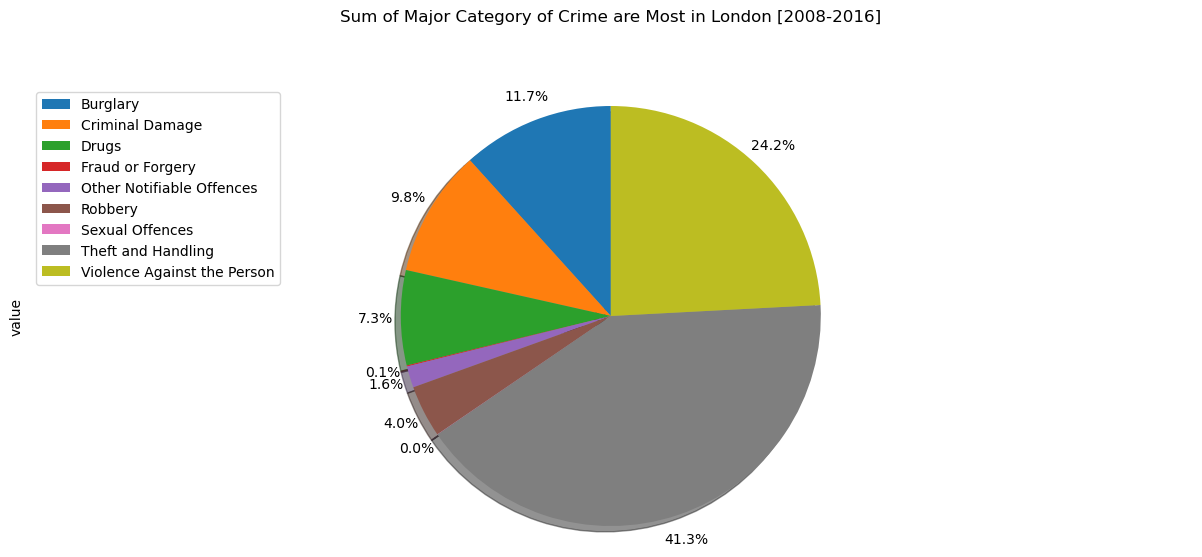

In [23]:
df_major['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,

                        )
plt.title("Sum of Major Category of Crime are Most in London [2008-2016]", y=1.12)
plt.axis('equal')
plt.legend(labels=df_major.index, loc='upper left')
plt.show()

Answer: In the pie chart above we can see that the crime with the highest number in the major crime category is Theft and Handling with a percentage of 41.3%, followed by Violence Against the Person which takes second place with a percentage of 24.2%.

## Box Plot
Question: Visualize Box Plot to see how the total number of criminal cases were distributed around Borough each year.

In [24]:
df_lb = df_lc.pivot_table(index='borough', columns='year', values='value', aggfunc=sum)
df_lb.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


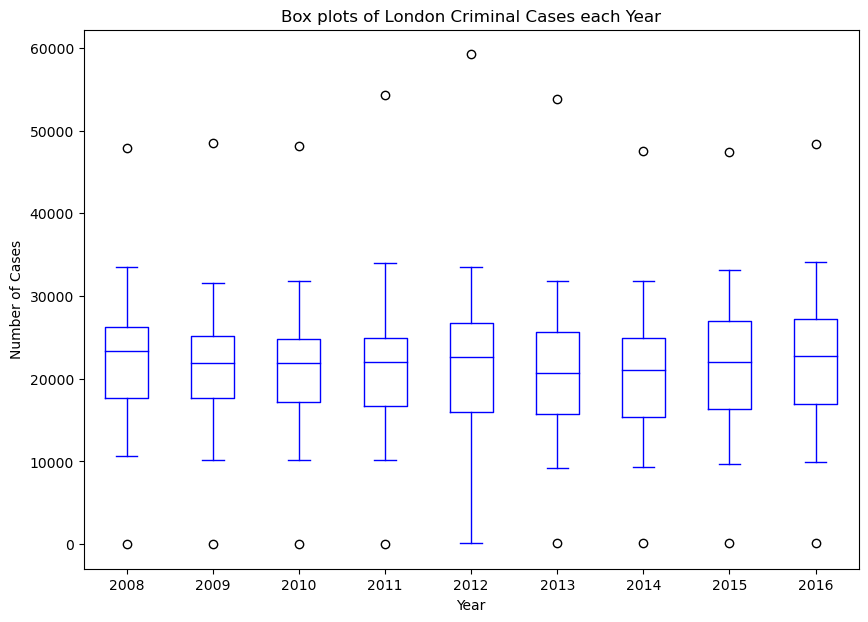

In [25]:
df_lb.plot(kind='box', figsize=(10, 7), color='blue', vert=True)

plt.title('Box plots of London Criminal Cases each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()


Answer: The box plot above show us that while the distribution of all criminal cases tends to be the same every year, the distribution in 2012 tended to be larger. The existence of boroughs with 0 cases and boroughs with extremely high case counts each year are the outliers at the top and bottom of the box plot range.

## Scatter Plot
Question: Make a scatter plot of all the criminal cases that occurred in London during the years of 2008-2013.

In [26]:
df_sp = df_lc.pivot_table(index='year', columns='borough', values='value', aggfunc=sum)
df_sp['Total'] = df_sp.sum(axis=1)
sum_sp = df_sp[['Total']]
sum_sp.reset_index(inplace=True)
sum_sp

borough,year,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


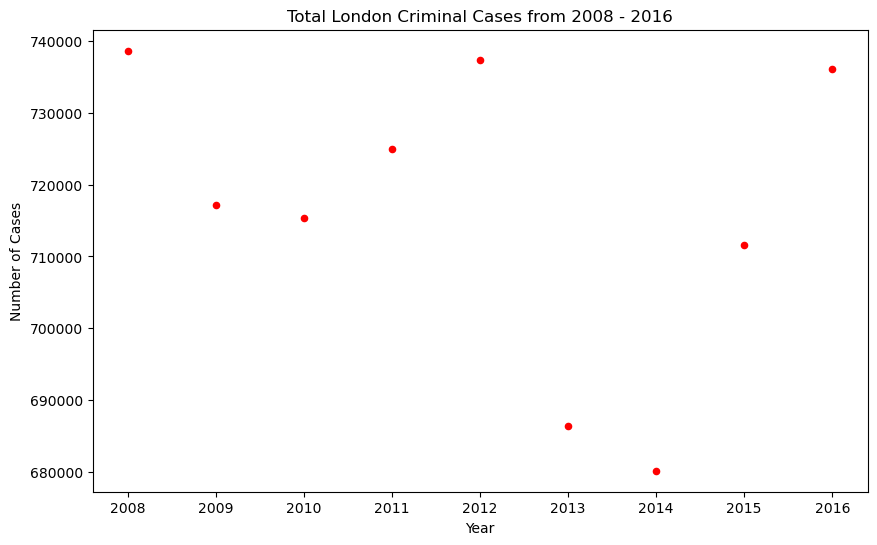

In [27]:
sum_sp.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='red')

plt.title('Total London Criminal Cases from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

Answer: From the scatter plot above, we can conclude that the difference is not very significant between years. 2008, 2012 and 2016 are the 3 years that have the most crime reports in London.

## Word Clouds
Question: What are some of the minor categories that frequently happen to criminal cases in London?

In [28]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

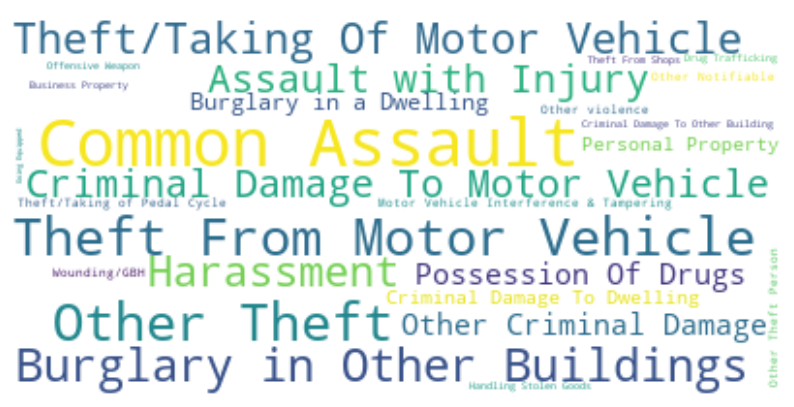

In [29]:
grouped_data = df_lc['minor_category'].value_counts().reset_index()
grouped_data.columns = ['minor_category', 'count']

wordcloud_data = dict(zip(grouped_data['minor_category'], grouped_data['count']))

wc = WordCloud(
    background_color='white',
    max_words=100,
    stopwords=None  
)

wc.generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


Answer: For each word that is large, it is a minor category that is often reported in London crimes such as Theft From Motor Vehicle, Common Assault, and Other Theft.